<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/lecture_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математика для Data Science. Нетология. Лекция 4.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Методы математической оптимизации

Имеется задача классификации. Нужно определить, к какому классу относится тот или иной элемент. Если используется двухмерное пространство, то мы ищем прямую, которая будет отделять два класса максимально равномерно. 

Задача классификатора - подобрать такую прямую, которая будет отделять один класс от другого максимально далеко в пространстве.

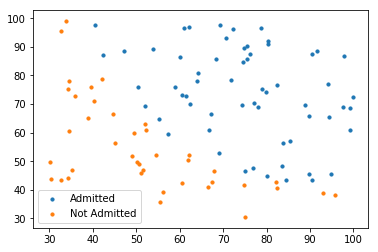

In [0]:

# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def load_data(path, header):
    marks_df = pd.read_csv(path, header=header)
    return marks_df


if __name__ == "__main__":
    # load the data from the file
    data = load_data("marks.txt", None)

    # X = feature values, all the columns except the last column
    X = data.iloc[:, :-1]

    # y = target values, last column of the data frame
    y = data.iloc[:, -1]

    # filter out the applicants that got admitted
    admitted = data.loc[y == 1]

    # filter out the applicants that din't get admission
    not_admitted = data.loc[y == 0]

    # plots
    plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
    plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
    plt.legend()
    plt.show()

In [0]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

In [0]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))
  
def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

In [0]:
import scipy 
from scipy.optimize import fmin_tnc


def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,
                  fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]


parameters = fit(X, y, theta)
#theta = np.zeros((X.shape[1], 1))
#parameters = fit(np.array(X), np.array(Y), theta=[0.01, 0.01])

In [0]:
X.shape

(100, 3)

Параметры модели

In [0]:
parameters

array([-25.16131865,   0.20623159,   0.20147149])

Найденные параметры модели показывают линейную функцию вида:

![alt text](https://sun9-10.userapi.com/c855428/v855428442/e114a/uqRYWgixSuc.jpg)

Приравнивая h(x) нулю, найдём уравнение прямой для классификации:

![alt text](https://sun9-46.userapi.com/c855428/v855428442/e1143/MBpde4xtYXk.jpg)

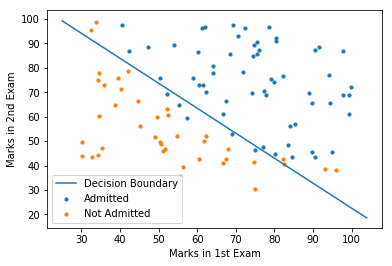

In [0]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')

plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

**Точность модели:**

In [0]:
def predict(x):
    theta = parameters[:, np.newaxis]
    return probability(theta, x)

def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100
accuracy(X, y.flatten())

89.0

Библиотека sklearn позволяет решить задачу:

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.flatten(),predicted_classes)
parameters = model.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Параметры прямой:

In [0]:
parameters

array([[-2.85831439,  0.05214733,  0.04531467]])

Загрузим датасет для классификации: heart desease (https://www.kaggle.com/bgr2089/heart-analysis).

*  age
*  sex
*  cp chest pain type (4 values)
*  trestbps resting blood pressure
*  chol serum cholestoral in mg/dl
*  fbs fasting blood sugar > 120 mg/dl
*  restecg resting electrocardiographic results (values 0,1,2)
*  thalach maximum heart rate achieved
*  exang exercise induced angina
*  oldpeak = ST depression induced by exercise relative to rest. A test that indicates a high probability of coronary artery disease is one in which there is substantial ST depression at low work rate associated with   typical angina-like pain and a drop in blood pressure. Deeper and more widespread ST depression generally indicates more severe or extensive disease.
*  the slope of the peak exercise ST segment
*  ca number of major vessels (0-3) colored by flourosopy
*  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
*  target - ill or not

Каждый человек в датасете имеет сердечную болезнь в диапазоне от 0 (есть болезнь) до 4 (нет болезни). Таким образом, данный датасет - типичная проблема классификации, где всего 5 классов, включая класс 0.

In [0]:
url="http://yustiks.ru/dataset/heart.csv"
data=pd.read_csv(url)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Возьмём двухмерное пространство. Допустим, мы хотим на основе имеющихся атрибутов (cp - тип боли в груди и chol - уровень холестерола) определять болен человек или здоров. Первое - мы хотим научиться определять класс 0 (больных). Наша задача - найти прямую, которая будет отделять класс 0 от всех остальных в пространстве. 

In [0]:
var1 = 'oldpeak'
var2 = 'cp'
X = data.loc[:, [var1, var2]]
Y = data.loc[:, ['target']]

In [0]:
X[0] = 1

In [0]:
X.head()

,oldpeak,cp,0
0,2.3,3,1
1,3.5,2,1
2,1.4,1,1
3,0.8,1,1
4,0.6,0,1


In [0]:
new_index= [0, var1, var2]
X = X.reindex(new_index, axis='columns')

In [0]:
X.head()

,0,oldpeak,cp
0,1,2.3,3
1,1,3.5,2
2,1,1.4,1
3,1,0.8,1
4,1,0.6,0


In [0]:
list_indexes_class0 = Y[Y['target']==0].index.values.tolist()
list_indexes_class1 = Y[Y['target']==1].index.values.tolist()
X0 = X.loc[list_indexes_class0, :]
X1 = X.loc[list_indexes_class1, :]

2 класса в пространстве

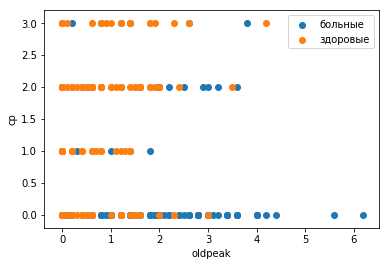

In [0]:
plt.xlabel(var1)
plt.ylabel(var2)

plt.scatter(X0.loc[:, var1], X0.loc[:, var2])
plt.scatter(X1.loc[:, var1], X1.loc[:, var2])
plt.legend(['больные', 'здоровые'])
plt.show()

В данном случае (если посмотреть на данные), можно провести прямую приблизительно так, чтобы отделять один класс от другого:
![alt text](https://sun9-55.userapi.com/c855232/v855232121/e05f8/P2gG1zvM3wY.jpg)

Я определила прямую графически, задача логистической регрессии - найти данную прямую математически.

In [0]:
X = np.array(X)
Y = np.array(Y)

In [0]:
parameters = fit(X, Y, theta)

In [0]:
parameters

array([ 0.24187394, -1.01110043,  1.00582297])

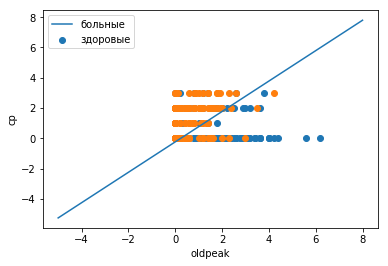

In [116]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel(var1)
plt.ylabel(var2)

plt.scatter(X0.loc[:, var1], X0.loc[:, var2])
plt.scatter(X1.loc[:, var1], X1.loc[:, var2])
plt.legend(['больные', 'здоровые'])
#plt.scatter(x_values, admitted.iloc[:, 1], s=10, label='Admitted')
#plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')

plt.show()

### Нахождение уравнения плоскости по точкам, через которые она проходит.
Уравнение плоскости в 3-х мерном пространстве задаётся уравнением:
\begin{matrix}
z = ax + by + c & (1)
\end{matrix}
Уравнение плоскости однозначно задаётся 3 точками через которые она проходит.

Таким образом легко понять, что если мы знаем координаты точек, через которые проходит плоскость, то в уравнении (1) у вас 3 переменных: a, b, c. А значения x, y, z нам известны для 3 точек.

Если плоскость проходит через точки (1;-6;1), (0;-3;2) и (-3;0;-1), то мы легко можем найти коэффициенты, подставив значения соответсвующих координат для всех 3 точек в уравнение (1) и получив систему из 3 уравнений.

Для точки x = 1, y = -6, z = 1:
\begin{matrix}
a\cdot 1 + b\cdot (-6) + c = 1 & (2)
\end{matrix}

Для точки x = 0, y = -3, z = 2:
\begin{matrix}
a\cdot 0 + b\cdot (-3) + c = 2 &(3)
\end{matrix}

Для точки x = -3, y = 0, z = -1:
\begin{matrix}
a\cdot (-3) + b\cdot 0 + c = -1 &(4)
\end{matrix}

На основании системы уравнений (2), (3), (4) можно записать матрицу коэффициентов перед неизвестными (левая часть матрицы):

\begin{pmatrix}
1& -6 & 1
\\ 
0 & -3 & 1
\\ 
-3 & 0 & 1
\end{pmatrix}

И вектор свободных членов (правая часть):
\begin{pmatrix}
1
\\ 
2
\\
-1
\end{pmatrix}

In [117]:
import numpy # импортируем библиотеку 

M5 = numpy.array([[1., -6., 1.], [0., -3., 1], [-3, 0, 1]]) # Матрица (левая часть системы)
v5 = numpy.array([1., 2., -1.]) # Вектор (правая часть системы)

numpy.linalg.solve(M5, v5)


array([2., 1., 5.])

**Ответ: уравнение искомой плоскости в пространстве задаётся уравнением $z = 2x + y + 5$**